In [3]:
import folium
import pandas as pd
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display

import geopandas as gpd
import matplotlib.pyplot as plt





# Load the first CSV file
csv_data_1 = pd.read_csv('Stocking_All_Years.csv')

# Load the second CSV file
csv_data_2 = pd.read_csv('output_with_geocodes.csv')  # Replace with the actual file name

# Merge the two dataframes on the 'Water Name' column
merged_data = pd.merge(csv_data_1, csv_data_2, on='Water Name', how='inner')

# Display the first few rows of the merged dataframe
merged_data.head()



# Ensure 'Year' column exists in merged_data
if 'Year' not in merged_data.columns:
    merged_data['Year'] = pd.to_datetime(merged_data['Date Stocked_x']).dt.year

# Function to create the map for a specific year
def create_map(year):
    # Create a map centered on Utah
    utah_map = folium.Map(location=[39.3210, -111.0937], zoom_start=7)
    
    # Filter the data for the selected year
    year_data = merged_data[merged_data['Year'] == year]
    
    # Group the data by 'Water Name' and 'Species'
    grouped_data = year_data.groupby(['Water Name', 'Spieces_x']).agg({
        'County_x': 'first',
        'Quanty_x': 'sum',
        'Latitude': 'first',
        'Longitude': 'first'
    }).reset_index()
    
    # Add the merged data points to the map
    for water_name, group in grouped_data.groupby('Water Name'):
        # Combine the information for the popup
        popup_info = "<br>".join(
            f"<br>{row['Spieces_x']}<br>Quantity: {row['Quanty_x']}"
            for idx, row in group.iterrows()
        )
        # Use the first row's location for the marker
        first_row = group.iloc[0]
        folium.CircleMarker(
            location=[first_row['Latitude'], first_row['Longitude']],
            radius=2,
            popup=f"{water_name}<br>{popup_info}",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(utah_map)
    
    return utah_map

# Create the slider widget for selecting the year
year_slider = widgets.IntSlider(
    value=2024,
    min=merged_data['Year'].min(),
    max=merged_data['Year'].max(),
    step=1,
    description='Year:',
    continuous_update=False
)

# Create an output widget to display the map
output = widgets.Output()

# Function to update the map based on the selected year
def on_year_change(change):
    with output:
        # Clear the previous output
        output.clear_output(wait=True)
        
        # Display the updated map
        updated_map = create_map(change.new)
        display(updated_map)

# Link the slider to the update function
year_slider.observe(on_year_change, names='value')

# Display the slider and the output widget
display(year_slider, output)

# Initially display the map for the first year
with output:
    initial_map = create_map(year_slider.value)
    display(initial_map)

IntSlider(value=2024, continuous_update=False, description='Year:', max=2024, min=2002)

Output()

Interactive Map of Stocked Bodies of Water in Utah

We’ve developed a simple-to-use interactive map that shows all the bodies of water in Utah that have been stocked with fish. Each point on the map represents a specific body of water and indicates which fish species have been stocked there. Additionally, at the top of the map, there’s a slider feature that allows users to view data from previous years, so they can track what’s changed over time.

C:\Users\Chase\AppData\Local\Temp\ipykernel_13708\3358516620.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['entry_count'].fillna(0, inplace=True)


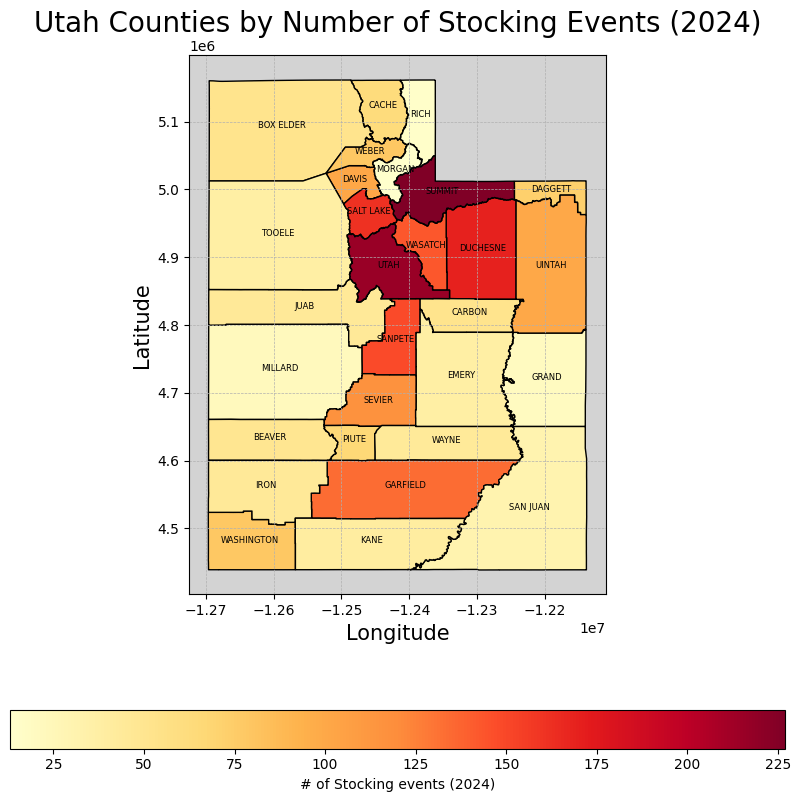

In [4]:



# Load the CSV file (replace 'Stocking_All_Years.csv' with the actual file path)
csv_data = pd.read_csv('Stocking_All_Years.csv')

# Convert the 'Date Stocked' column to datetime format
csv_data['Date Stocked'] = pd.to_datetime(csv_data['Date Stocked'], format='%m/%d/%Y')

# Filter the data for the year 2024
csv_data_2024 = csv_data[csv_data['Date Stocked'].dt.year == 2024]

# Count the number of entries per county in 2024
county_counts_2024 = csv_data_2024['County'].value_counts().reset_index()
county_counts_2024.columns = ['NAME', 'entry_count']  # Rename columns for merging

# Load the shapefile for Utah counties
gdf = gpd.read_file('Counties/Counties.shp')

# Merge the county counts for 2024 with the GeoDataFrame based on the 'NAME' column
gdf = gdf.merge(county_counts_2024, on='NAME', how='left')

# Replace NaN values (counties with no entries in the CSV) with 0
gdf['entry_count'].fillna(0, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the counties with a color scale based on 'entry_count'
gdf.plot(ax=ax, column='entry_count', cmap='YlOrRd', edgecolor='black', legend=True,
         legend_kwds={'label': "# of Stocking events (2024)", 'orientation': "horizontal"})

# Add county names
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), fontsize=6, ha='center')

# Set titles and labels
ax.set_title("Utah Counties by Number of Stocking Events (2024)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_ylabel("Latitude", fontsize=15)

# Customize grid and background
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_facecolor('lightgrey')

# Show the plot
plt.show()


A simple heatmap of stocking events across Utah in 2024 reveals a clear pattern: stocking is largely concentrated in areas with higher human populations. In counties with denser populations, more fish are stocked to meet the increased demand for fishing. This highlights the correlation between human population density and the distribution of stocked bodies of water, as stocking efforts are focused on maintaning bodies of water with the demand of anglers. 